# Computer Homework 4: The Method of Relaxation Meets Capacitors

In the last assignment, you used the method of relaxation to find the potential inside a rectangular box, where the potential was specified on the sides. Now, it turns out that we could have solved that particular problem analytically (you will learn how to do this in Physics 405). But the real power of the method of relaxation is that it allows us to study problems that don't have an analytical solution, but occur frequently in the real world. 

Consider the familiar example of a parallel-plate capacitor. In most physics classes, we pretend that the electric field between the plates can be approximated by the field of two infinite charged planes, so it's constant in between the plates and zero everywhere outside. Here's a typical illustration of this approximation:

<img src="capacitor.gif" alt="Parallel-plate capacitor" style="width: 200px;"/>

In reality, this is an idealization, like frictionless surfaces and masssless springs. The approximation works as long as the linear dimensions of the plates are large compared to the separation: $A\gg d^2$. In this assignment we'll apply this technique to understand what the electric field of a parallel-plate capacitor <i>really</i> looks like, and learn how the usual approximation starts to break down as the plate separation increases.

It will help you to review the last assignment, as you should be able to recycle much of your code.

## Import the usual libraries

In [2]:
import numpy as np                         # numpy is a library that inclues most of the numerical funciton you will need
import matplotlib.pyplot as plt            # this is the library we use to plot
import matplotlib.cm as cm                 # allows us to choose a variety of colormaps
from mpl_toolkits.mplot3d import Axes3D    # this is a special library to plot in 3d

### Boundary conditions

In the last assignment, you began with a grid of potential values, ```V```. The potential on the sides of the box was fixed. You may have implemented these constraints through a function like this:

In [4]:
# This function sets the values of V on the sides to those given in the problem.
def impose_left_right_boundary_conditions(V):
    Vnew = V
    Vnew[:,0] = -100       # set left side to V=-100
    Vnew[:,-1] = 100       # ...and right side to V=+100
    Vnew[0,:] = 0          # set top side to 0
    Vnew[-1,:] = 0         # ... and bottom side to 0
    return Vnew

The remainder of your code simply implemented the method of relaxation and made some plots. Here's the beauty of writing modular code: <b>by changing the boundary conditions in this one function, you can solve any other problem!</b>

As an example, let's compute the potential of an electric dipole. To do this, we'll simply change the function above so that ```V``` is constrained to have equal and opposite values at two nearby pixels.

In [5]:
# This function mimics an electric dipole: 
def impose_dipole_boundary_conditions(V):
    Vnew = V
# Find the center of the grid, and place the charges near that point.
    mid_x = int(V.shape[1]/2)   # midpoint of x-dimension
    mid_y = int(V.shape[0]/2)   # midpoint of y-dimension
    Vnew[mid_y-4][mid_x] = 100  # set upper pixel to V=+100
    Vnew[mid_y+4][mid_x] = -100 # set lower pixel to V=-100
    return Vnew

First we'll illustrate this function with a small, "toy" array that's small enough to print easily:

In [7]:
V = np.zeros((12,12))
print(V)
V = impose_dipole_boundary_conditions(V)
print(V)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.  100.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0

This makes a dipole oriented vertically. Try to modify the above function to make a horizontal dipole.

Next, we'll make a much larger, more physically realistic grid, and implement the relaxation method. These next steps should require few, if any, modifications to the code you wrote in the last assignment. 

In [8]:
def relax(V): 
    # Replace each cell with the average of the 4 cells around it.
    Vnew = (np.roll(V,-1, axis=0) + np.roll(V,1, axis=0) + 
            np.roll(V,-1, axis=1) + np.roll(V,1, axis=1)) / 4
    # But don't change the BC's
    Vnew = impose_boundary_conditions(Vnew)    
    return Vnew

In [9]:
Npoints = 100   # grid will be Npoints x Npoints
x, y = np.meshgrid(np.linspace(-5,5,Npoints),
                  np.linspace(-5,5,Npoints))
V = np.zeros((Npoints,Npoints))   # bigger grid
V = impose_boundary_conditions(V)   # initialize the grid

# main loop:
N_iter = 0    # counter for number of iterations
tolerance = 0.001     # stop when all values change by less than this amount.
error = 1000
max_iter = 100000     # avoid an infinite loop
max_err = np.zeros(max_iter)  # container to track error vs. iteration number
while error>tolerance and N_iter<max_iter:
    Vold = V
    V = relax(Vold)
    error = np.max(np.abs(V-Vold))   # largest difference between new and old values
    max_err[N_iter] = error
    N_iter +=1
 
print("Convergence after", N_iter," iterations")

Convergence after 3496  iterations


Finally, let's visualize our result in several different ways. You can play around with the plotting options (in particular, the "levels" argument to the contour plot) to make plots that you like.

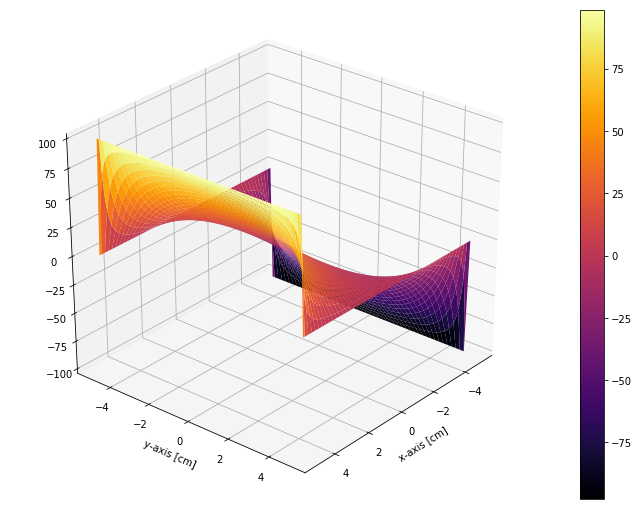

In [10]:
fig = plt.figure(figsize=(12,9))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x,y,V, cmap=cm.inferno)
cbar = fig.colorbar(surf)
ax.set_ylabel('y-axis [cm]')
ax.set_xlabel('x-axis [cm]')
ax.view_init(30, 40)

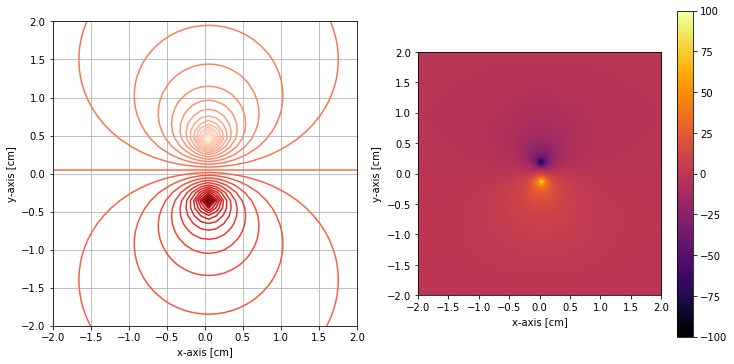

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
contour1 = ax1.contour(x,y,V, levels=np.arange(-100,100,5),cmap=cm.Reds)    # This gives an unfilled plot
#ax1.clabel(contour1, fontsize=10, colors='black')  # label the contours
ax1.grid()
ax1.set_aspect('equal')
ax1.set_ylabel('y-axis [cm]')
ax1.set_xlabel('x-axis [cm]')
ax1.set_xlim([-2,2])
ax1.set_ylim([-2,2])

img = ax2.imshow(V, origin='lower', interpolation='bicubic', cmap=cm.inferno, 
                extent=[-2,2,-2,2])   

ax2.set_ylabel('y-axis [cm]')
ax2.set_xlabel('x-axis [cm]')
cbar = fig.colorbar(img)

Finally, calculate the electric field. Again, this code should be nearly identical to what you did in the last assignment. Now we are just operating on a different ```V```.

In [9]:
# Calculating E from V is this simple!
Ex = - (np.roll(V,-1,axis = 1) - np.roll(V,1,axis = 1))/2
Ey = - (np.roll(V,-1,axis = 0) - np.roll(V,1,axis = 0))/2
magE = np.hypot(Ex, Ey)

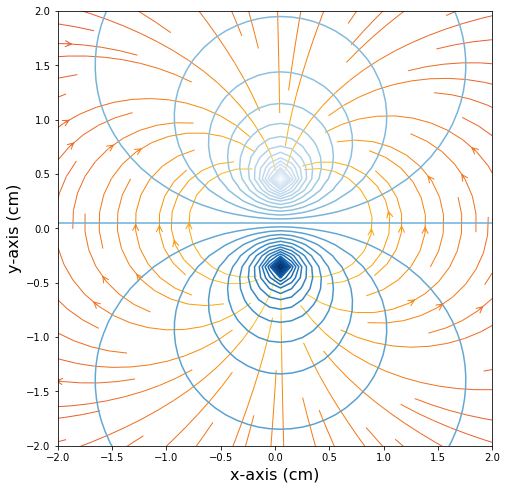

In [10]:
# Make a plot of E and V
fig, ax = plt.subplots(1, figsize=(8,8))
color = 2 * np.log(magE)    # colors the arrows based on field strength
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)
contour1 = ax.contour(x,y,V, levels=np.arange(-100,100,5),cmap=cm.Blues)
#ax.clabel(contour1, fontsize=10, colors='black')  # label the contours
ax.set_aspect('equal')
ax.set_xlabel('x-axis (cm)', fontsize=16)
ax.set_ylabel('y-axis (cm)', fontsize=16)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])

# Here is how to save a figure to a file:
plt.savefig('dipole_field.png')   # this function supports many formats... .jpg, .gif, .pdf, etc.

This cell shows how to display the saved image from the previous cell. You'll need to do this in the assignment. Click on this cell to see the markdown syntax:

<img src="dipole_field.png" alt="E and V for a dipole" style="width: 400px;"/>

You can use this same approach to solve <i>any</i> problem that you can describe with appropriate boundary conditions. For example, what happens if you place a point charge above a grounded plane? What happens if you add a small vertical projection to the plane? Now you are describing a charged thundercloud above a tree or building. You can think of many more examples, some of which might make good final projects.

For this week's assignment, we'll study the parallel-plate capacitor. To specify these boundary conditions, you'll need to set the potential on two segments of pixels near the middle of your grid. We'll again illustrate this with a small "toy" array.

In [11]:
V = np.zeros((12,12))   # initialize a small array
print('This is the original array:')
print(V)
print('Set a short horizonal segment equal to 1:')
V[3][3:9] = 1
print(V)

This is the original array:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Set a short horizonal segment equal to 1:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In the above code, note that:
* Counter-intuitively, The ```y```-index is the first "slot" in the array, and the ```x```-index is the second.
* y-values start at zero in the top column and increase downward.
* x-values start from zero in the left column and increase to the right.
* Array indices start with zero: ```a[0]``` represents the first element of the array ```a```.
* When you specify a range of indices, the last element in your range is not included. For example, note that when we changed the value of x-elements \[3:9\] in the code above, it changed cells 3,4,5,6,7 and 8 (but not 9).

## Your assignment (due Thursday, Oct. 11)

We'll consider a parallel-plate capacitor with width $L$ pixels and separation $d$ pixels. You will be changing $d$ so that we can study the field as a function of $d/L$. 

<img src="img/cap-illustration.png" alt="parallel-plate capacitor" style="width: 400px;"/>

### Part 1 (10 pts): Set up a grid to describe the region containing your capacitor, including appropriate values for the potential on the top and bottom plates.

Make a new ```impose_boundary_conditions()``` function that describes a parallel-plate capacitor with a specified length $L$ and separation $d$. Set the potential to be +100 V on the top plate and -100 V on the bottom plate. Consider making the separation $d$ an argument to your function so that you can change it easily.

You will need to experiment with different grid spacings and shapes... your array does not necessarily have to be square. You'll want your grid to be fine enough to resolve the field between the plates, while being large enough to include the field well outside the plates. When I changed my code above to use a 1000 x 1000 grid ($=10^6$ cells), the method of relaxation still converged in a few seconds. 

In [41]:
# Your code goes here

### Part 2 (10 pts): Plot the equipotential contours for the following values of $d/L$: (0.1, 0.2, 0.3, 0.5, 1.0, 2.0). 

Save your plots and include them as described above. (You will need to upload these plots to Canvas along with your completed notebook.)

Full credit for: 

(1) Appropriately-chosen grid sizes so that the field is computed accurately in the regions of interest.  

(2) Clear and readable plots with axes labeled and the value of $d/L$ noted somewhere. 

In [42]:
# Your code goes here

Double click to write any further comments explaining your results.  

### Part 3 (10 pts): Referring to the diagram above, make a plot of $E_{\mathrm{edge}}/E_{\mathrm{center}}$ as a function of $d/L$.

Use the same six $d/L$ values as in the previous section. Recall that in our idealized approximation, $E_{\mathrm{edge}}/E_{\mathrm{center}}$ is always $1$.

Full credit for a nice plot that shows how this "fringing field" <i>really</i> behaves.

In [43]:
# Your code goes here

### Part 4 (10 pts): For the case $d/L = 0.2$, make a plot of $E$ vs. $x$, where the $x$-axis is the line through the midplane of the capacitor.

Your plot should run from $x=-2L$ to $x=+2L$. About how far away from the edge do you need to be before the field strength reaches 10% of its peak value? How about 1% of its peak value?

Full credit for a nicely-labeled and correct plot. 

In [44]:
# Your code goes here.

Double click to write any final discussion here.